> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def shape_data(df_toshape):
    """
    inplace is used to alter the original object
    """
    if 'geo' in df_toshape.columns:
        df_toshape.set_index('geo', inplace=True)
        early_dates = [x.astype(str) for x in list(df_toshape.columns.values.astype(int)) if x < 1992]
        late_dates = [x.astype(str) for x in list(df_toshape.columns.values.astype(int)) if x > 2015]
        drop_dates = early_dates + late_dates
        df_toshape.drop(drop_dates, axis=1, inplace=True)
        return df_toshape
    else:
        print("Column name 'geo' doesn't exist, returned the same dataframe.")
        return df_toshape    

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_dict = {}
df_forest = pd.read_csv('Data/forest_area_sq_km.csv')
df_dict['forest_area'] = df_forest
df_forest_ratio = pd.read_csv('Data/forest_coverage_percent.csv')
df_dict['forest_ratio'] = df_forest_ratio
df_popt = pd.read_csv('Data/population_total.csv')
df_dict['population_total'] = df_popt
df_popg = pd.read_csv('Data/population_growth_annual_percent.csv')
df_dict['population_growth'] = df_popg
df_popd = pd.read_csv('Data/population_density_per_square_km.csv')
df_dict['population_density'] = df_popd
df_gdpgr = pd.read_csv('Data/gdp_per_capita_yearly_growth.csv')
df_dict['gdp_growth_pc'] = df_gdpgr
df_gdp_tot = pd.read_csv('Data/total_gdp_us_inflation_adjusted.csv')
df_dict['gdp_tot'] = df_gdp_tot
df_gdp_pc = pd.read_csv('Data/gdppercapita_us_inflation_adjusted.csv')
df_dict['gdp_pc'] = df_gdp_pc
df_agrtoland = pd.read_csv('Data/agricultural_land_percent_of_land_area.csv')
df_dict['agricultural_land_ratio'] = df_agrtoland
df_agrtogdp = pd.read_csv('Data/agriculture_percent_of_gdp.csv')
df_dict['agricultural_gdp_ratio'] = df_agrtogdp
df_area = pd.read_csv('Data/surface_area_sq_km.csv')
df_dict['surface_area'] = df_area
df_dict.keys()
# make df_agr_area later
#df = pd.concat(df_dict).transpose()

dict_keys(['forest_area', 'forest_ratio', 'population_total', 'population_growth', 'population_density', 'gdp_growth_pc', 'gdp_tot', 'gdp_pc', 'agricultural_area', 'agricultural_gdp', 'surface_area'])

In [4]:
df_forest = shape_data(df_forest)
forest_1992 = df_forest['1992'].sort_values(ascending=False)
forest_1992 = pd.DataFrame([forest_1992]).transpose()
forest_1992 = forest_1992.rename(columns={"1992": "area"})
world_total = forest_1992.sum()['area']
forest_1992['word_pct'] = (forest_1992 / world_total)*100
forest_1992['cum_word_pct'] = forest_1992.cumsum()['word_pct']
forest_1992.head()

,area,word_pct,cum_word_pct
geo,,,
Russia,8090000.0,19.701607,19.701607
Brazil,5420000.0,13.199346,32.900953
Canada,3480000.0,8.474857,41.375810
United States,3030000.0,7.378970,48.754781
China,1610000.0,3.920839,52.675620


In [5]:
for k, v in df_dict.items():
    print(k + ": ")
    print(v.shape)



forest_area: 
(193, 24)
forest_ratio: 
(192, 27)
population_total: 
(195, 220)
population_growth: 
(194, 59)
population_density: 
(195, 152)
gdp_growth_pc: 
(194, 220)
gdp_tot: 
(190, 59)
gdp_pc: 
(190, 59)
agricultural_area: 
(192, 56)
agricultural_gdp: 
(189, 59)
surface_area: 
(194, 58)


In [6]:
for k, v in df_dict.items():
    print(k + ": ")
    display(v.head())

forest_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,...,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
Albania,7850.0,7830.0,7810.0,7790.0,7770.0,7750.0,7730.0,7710.0,7690.0,7720.0,...,7810.0,7800.0,7790.0,7780.0,7760.0,7750.0,7740.0,7730.0,7720.0,7720.0
Algeria,16500.0,16400.0,16300.0,16200.0,16100.0,16100.0,16000.0,15900.0,15800.0,15700.0,...,16100.0,16900.0,17700.0,18400.0,19200.0,19300.0,19300.0,19400.0,19500.0,19600.0
Andorra,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
Angola,607000.0,606000.0,605000.0,604000.0,602000.0,601000.0,600000.0,599000.0,597000.0,596000.0,...,590000.0,589000.0,587000.0,586000.0,585000.0,584000.0,582000.0,581000.0,580000.0,579000.0


forest_ratio: 


,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07
1,Albania,28.80,28.70,28.60,28.60,28.50,28.40,28.40,28.30,28.20,...,28.50,28.50,28.40,28.40,28.30,28.30,28.30,28.20,28.20,28.20
2,Algeria,0.70,0.70,0.69,0.69,0.69,0.68,0.68,0.67,0.67,...,0.68,0.71,0.74,0.77,0.81,0.81,0.81,0.81,0.82,0.82
3,Andorra,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
4,Angola,48.90,48.80,48.70,48.60,48.50,48.40,48.30,48.20,48.10,...,47.30,47.20,47.10,47.00,46.90,46.80,46.70,46.60,46.50,46.40


population_total: 


,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,28000000,28800000,29700000,30700000,31700000,32800000,33700000,34700000,35500000,36400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,2960000,2940000,2930000,2920000,2920000,2920000,2920000,2930000,2930000,2930000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,35500000,36100000,36800000,37600000,38300000,39100000,39900000,40600000,41300000,42000000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,84500,84400,83800,82400,80800,79200,78000,77300,77000,77000
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,22500000,23400000,24200000,25100000,26000000,26900000,27900000,28800000,29800000,30800000


population_growth: 


,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1.82,1.88,1.94,1.99,2.05,2.11,2.13,2.15,2.21,...,2.510,2.570,2.8100,3.100,3.270,3.320,3.180,2.940,2.690,2.490
1,Albania,3.02,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,...,-0.767,-0.674,-0.4960,-0.269,-0.165,-0.183,-0.207,-0.291,-0.160,-0.092
2,Algeria,2.51,2.49,2.47,2.49,2.56,2.66,2.76,2.84,2.88,...,1.620,1.720,1.8200,1.920,2.010,2.040,2.000,1.920,1.830,1.740
3,Andorra,7.05,6.94,6.69,6.56,6.24,6.00,5.75,5.50,5.31,...,1.410,0.714,-0.0154,-0.830,-1.590,-2.010,-1.960,-1.540,-0.944,-0.410
4,Angola,1.90,1.93,1.95,1.93,1.87,1.79,1.70,1.65,1.68,...,3.560,3.570,3.5700,3.570,3.560,3.530,3.490,3.430,3.370,3.310


population_density: 


,geo,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,11.90,12.00,12.20,12.30,12.50,12.70,12.90,13.10,13.30,...,110.0,110.0,110.0,109.0,109.0,109.0,109.0,108.0,108.0,108.0
1,Albania,46.10,47.00,48.00,49.20,50.50,51.80,53.30,54.70,56.30,...,66.3,65.6,64.9,64.2,63.6,62.9,62.3,61.7,61.1,60.5
2,Algeria,3.73,3.80,3.87,3.95,4.03,4.13,4.23,4.33,4.44,...,26.4,26.4,26.4,26.4,26.4,26.4,26.3,26.3,26.3,26.3
3,Andorra,13.20,14.20,15.40,16.70,18.10,19.60,21.30,22.90,24.70,...,137.0,137.0,136.0,136.0,136.0,135.0,135.0,135.0,135.0,134.0
4,Angola,3.65,3.74,3.83,3.92,4.01,4.10,4.19,4.27,4.36,...,125.0,127.0,128.0,130.0,131.0,133.0,134.0,136.0,137.0,139.0


gdp_growth_pc: 


,geo,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,5.170,3.850,11.20,1.13,0.837,2.11,2.68,2.760,3.02,3.38
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.28,1.72,2.610,3.82,4.72,5.030,5.03,5.23
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.16,1.61,2.180,2.10,2.36,2.500,2.63,2.68
3,Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.13,1.03,2.240,2.46,2.77,0.262,3.46,3.55


gdp_tot: 


,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.210000e+10,1.470000e+10,1.590000e+10,1.690000e+10,1.940000e+10,2.010000e+10,2.060000e+10,2.090000e+10,2.140000e+10,2.200000e+10
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.110000e+10,1.150000e+10,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10,1.350000e+10,1.400000e+10
2,Algeria,2.740000e+10,2.370000e+10,1.900000e+10,2.560000e+10,2.710000e+10,2.870000e+10,2.740000e+10,2.990000e+10,3.320000e+10,...,1.530000e+11,1.560000e+11,1.610000e+11,1.660000e+11,1.710000e+11,1.760000e+11,1.830000e+11,1.900000e+11,1.960000e+11,1.990000e+11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.680000e+09,3.550000e+09,3.360000e+09,3.200000e+09,3.150000e+09,3.160000e+09,3.230000e+09,3.260000e+09,3.320000e+09,3.380000e+09
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11,1.030000e+11,1.040000e+11


gdp_pc: 


,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


agricultural_area: 


,geo,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,57.7,57.8,57.9,58.0,58.0,58.1,58.2,58.2,58.2,...,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1
1,Albania,45.0,45.0,45.0,44.9,45.1,45.3,45.4,45.3,45.1,...,40.9,40.8,43.1,43.8,43.8,43.8,43.8,43.3,42.9,42.9
2,Algeria,19.1,18.9,18.7,18.5,18.5,18.5,18.6,18.6,18.6,...,17.3,17.3,17.3,17.4,17.4,17.4,17.4,17.4,17.4,17.4
3,Andorra,55.3,55.3,55.3,55.3,55.3,55.3,55.3,55.3,55.3,...,46.3,44.2,44.2,44.2,42.1,42.1,39.9,40.0,40.0,40.0
4,Angola,45.9,45.9,45.9,45.9,45.9,46.0,46.0,46.0,46.0,...,46.2,46.3,46.3,46.8,46.8,47.3,47.3,47.5,47.5,47.5


agricultural_gdp: 


,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.700,29.100,26.10,23.600,23.600,22.600,22.000,20.50,21.000,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.800,16.800,18.00,18.200,18.800,19.600,20.000,19.80,19.900,19.0
2,Algeria,18.6,17.8,18.1,15.4,13.0,14.4,10.3,11.7,12.2,...,6.590,9.340,8.47,8.110,8.770,9.850,10.300,11.60,12.300,12.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.442,0.435,0.50,0.535,0.612,0.577,0.496,0.47,0.492,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


surface_area: 


,geo,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,...,653000.0,653000.0,653000.0,653000,653000,653000,653000,653000,653000,653000
1,Albania,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,...,28800.0,28800.0,28800.0,28800,28800,28800,28800,28800,28800,28800
2,Algeria,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,...,2380000.0,2380000.0,2380000.0,2380000,2380000,2380000,2380000,2380000,2380000,2380000
3,Andorra,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,...,470.0,470.0,470.0,470,470,470,470,470,470,470
4,Angola,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,...,1250000.0,1250000.0,1250000.0,1250000,1250000,1250000,1250000,1250000,1250000,1250000


In [7]:
for k, v in df_dict.items():
    print(k + ": ")
    print(v.info())

forest_area: 
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 24 columns):
1992    192 non-null float64
1993    192 non-null float64
1994    192 non-null float64
1995    192 non-null float64
1996    192 non-null float64
1997    192 non-null float64
1998    192 non-null float64
1999    192 non-null float64
2000    192 non-null float64
2001    192 non-null float64
2002    192 non-null float64
2003    192 non-null float64
2004    192 non-null float64
2005    192 non-null float64
2006    192 non-null float64
2007    192 non-null float64
2008    192 non-null float64
2009    192 non-null float64
2010    192 non-null float64
2011    193 non-null float64
2012    193 non-null float64
2013    193 non-null float64
2014    193 non-null float64
2015    193 non-null float64
dtypes: float64(24)
memory usage: 37.7+ KB
None
forest_ratio: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 27 columns):
geo    

In [8]:
for k, v in df_dict.items():
    print(k + ": ")
    display(v.describe())

forest_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,...,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02
mean,2.138679e+05,2.133308e+05,2.129860e+05,2.125831e+05,2.121329e+05,2.117903e+05,2.113730e+05,2.110449e+05,2.106703e+05,2.104541e+05,...,2.093810e+05,2.090529e+05,2.089973e+05,2.087250e+05,2.085574e+05,2.073080e+05,2.071676e+05,2.070069e+05,2.068406e+05,2.066927e+05
std,7.949771e+05,7.938801e+05,7.932194e+05,7.922300e+05,7.911591e+05,7.905268e+05,7.895641e+05,7.889537e+05,7.881342e+05,7.874052e+05,...,7.851442e+05,7.847846e+05,7.858126e+05,7.857882e+05,7.859819e+05,7.837924e+05,7.836656e+05,7.838346e+05,7.837072e+05,7.835367e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.417500e+03,3.407500e+03,3.407500e+03,3.407500e+03,3.400000e+03,3.405000e+03,3.385000e+03,3.360000e+03,3.327500e+03,3.327500e+03,...,3.372500e+03,3.365000e+03,3.300000e+03,3.272500e+03,3.275000e+03,3.310000e+03,3.310000e+03,3.320000e+03,3.320000e+03,3.320000e+03
50%,2.460000e+04,2.440000e+04,2.420000e+04,2.395000e+04,2.370000e+04,2.375000e+04,2.385000e+04,2.395000e+04,2.410000e+04,2.440000e+04,...,2.515000e+04,2.555000e+04,2.590000e+04,2.620000e+04,2.635000e+04,2.640000e+04,2.660000e+04,2.660000e+04,2.670000e+04,2.670000e+04
75%,1.047500e+05,1.055000e+05,1.055000e+05,1.070000e+05,1.092500e+05,1.107500e+05,1.130000e+05,1.135000e+05,1.142500e+05,1.140000e+05,...,1.072500e+05,1.075000e+05,1.077500e+05,1.080000e+05,1.082500e+05,1.070000e+05,1.070000e+05,1.070000e+05,1.070000e+05,1.070000e+05
max,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,8.090000e+06,...,8.100000e+06,8.110000e+06,8.130000e+06,8.140000e+06,8.150000e+06,8.150000e+06,8.150000e+06,8.150000e+06,8.150000e+06,8.150000e+06


forest_ratio: 


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,162.000000,165.000000,184.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,32.718025,33.538848,32.764022,32.566649,32.558989,32.503617,32.443564,32.386436,32.363191,32.305372,...,31.991615,31.969115,31.946354,31.921719,31.893750,31.972513,31.954974,31.928639,31.907068,31.879267
std,25.223341,25.750489,25.124209,24.838884,24.804592,24.721646,24.644216,24.572324,24.526291,24.461190,...,23.896402,23.871671,23.853312,23.839235,23.825992,23.824116,23.810324,23.793296,23.783266,23.775307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.500000,11.600000,10.975000,11.325000,11.100000,11.025000,11.025000,11.025000,11.050000,11.050000,...,11.200000,11.250000,11.075000,11.075000,11.100000,11.100000,11.050000,11.050000,11.000000,10.950000
50%,28.800000,29.200000,29.300000,29.500000,30.000000,30.350000,30.050000,30.150000,30.200000,30.300000,...,31.450000,31.400000,31.450000,31.500000,31.550000,31.900000,31.900000,32.000000,32.000000,32.100000
75%,52.025000,52.800000,51.675000,51.350000,51.500000,51.275000,51.050000,50.800000,50.750000,50.375000,...,49.625000,49.775000,49.600000,49.250000,48.850000,48.450000,48.100000,47.750000,47.650000,47.900000
max,98.900000,98.900000,98.900000,98.800000,98.800000,98.800000,98.800000,98.700000,98.700000,98.700000,...,98.500000,98.500000,98.500000,98.400000,98.400000,98.400000,98.400000,98.300000,98.300000,98.300000


population_total: 


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,4.858439e+06,4.875184e+06,4.896420e+06,4.921854e+06,4.944249e+06,4.965603e+06,4.987121e+06,5.008500e+06,5.029397e+06,5.056351e+06,...,3.501814e+07,3.548854e+07,3.594759e+07,3.636227e+07,3.679066e+07,3.719926e+07,3.767774e+07,3.804907e+07,3.851844e+07,3.895188e+07
std,2.623298e+07,2.635925e+07,2.654860e+07,2.676926e+07,2.695929e+07,2.714956e+07,2.730824e+07,2.749855e+07,2.768943e+07,2.791149e+07,...,1.337925e+08,1.353420e+08,1.368709e+08,1.379478e+08,1.390020e+08,1.400783e+08,1.416266e+08,1.422209e+08,1.437690e+08,1.448713e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,7.950000e+02,7.940000e+02,7.960000e+02,8.040000e+02,8.010000e+02,8.000000e+02,8.030000e+02,8.010000e+02,7.920000e+02,8.010000e+02
25%,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,...,1.590000e+06,1.665000e+06,1.725000e+06,1.780000e+06,1.840000e+06,1.900000e+06,1.955000e+06,1.975000e+06,1.990000e+06,2.000000e+06
50%,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.170000e+05,...,7.460000e+06,7.430000e+06,7.570000e+06,7.990000e+06,8.130000e+06,8.230000e+06,8.320000e+06,8.400000e+06,8.480000e+06,8.540000e+06
75%,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,...,2.325000e+07,2.390000e+07,2.450000e+07,2.500000e+07,2.580000e+07,2.655000e+07,2.725000e+07,2.790000e+07,2.855000e+07,2.920000e+07
max,3.220000e+08,3.240000e+08,3.270000e+08,3.300000e+08,3.330000e+08,3.360000e+08,3.380000e+08,3.410000e+08,3.440000e+08,3.470000e+08,...,1.350000e+09,1.360000e+09,1.370000e+09,1.380000e+09,1.380000e+09,1.390000e+09,1.400000e+09,1.400000e+09,1.410000e+09,1.420000e+09


population_growth: 


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,191.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,194.000000,194.000000,194.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,2.353517,2.332287,2.352344,2.344419,2.333380,2.297589,2.267584,2.251952,2.207820,2.189104,...,1.631345,1.584846,1.528262,1.467285,1.470765,1.465266,1.460253,1.423703,1.393022,1.358827
std,1.308387,1.424190,1.516222,1.530960,1.477462,1.420376,1.403649,1.422780,1.436988,1.483269,...,1.863377,1.676872,1.536419,1.512258,1.449622,1.444638,1.448571,1.254813,1.162510,1.133521
min,-0.281000,-1.020000,-0.444000,-0.869000,-1.180000,-1.440000,-1.750000,-2.040000,-2.090000,-1.890000,...,-1.670000,-1.650000,-2.100000,-2.630000,-2.150000,-3.040000,-3.110000,-2.470000,-1.640000,-1.420000
25%,1.570000,1.475000,1.417500,1.435000,1.447500,1.477500,1.495000,1.385000,1.310000,1.285000,...,0.604500,0.526750,0.491750,0.436000,0.464000,0.489000,0.480000,0.508000,0.519000,0.518000
50%,2.300000,2.350000,2.335000,2.300000,2.295000,2.280000,2.345000,2.340000,2.230000,2.235000,...,1.355000,1.300000,1.290000,1.300000,1.290000,1.280000,1.300000,1.220000,1.260000,1.250000
75%,2.985000,2.975000,2.980000,2.952500,2.927500,2.912500,2.880000,2.902500,2.882500,2.870000,...,2.377500,2.390000,2.352500,2.330000,2.310000,2.310000,2.320000,2.350000,2.240000,2.160000
max,10.300000,11.100000,11.600000,11.600000,11.300000,10.800000,10.300000,9.820000,9.210000,10.700000,...,15.500000,13.500000,11.200000,9.250000,7.760000,7.060000,9.110000,5.860000,5.220000,4.670000


population_density: 


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,143.611697,142.462267,142.640882,144.024097,146.077179,149.245215,152.310990,156.464559,160.047015,163.183415,...,483.038769,483.607436,484.564410,485.497077,486.435487,486.927077,487.930000,488.760051,489.130615,490.027795
std,974.815958,946.797482,933.258752,934.026160,941.992930,964.044928,985.894712,1021.827737,1050.623775,1072.468946,...,2843.051075,2849.496701,2862.878473,2876.213955,2889.636444,2896.108338,2909.639164,2923.080055,2929.523922,2942.967289
min,0.502000,0.511000,0.520000,0.530000,0.540000,0.550000,0.561000,0.573000,0.586000,0.600000,...,2.910000,2.910000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000,2.920000
25%,7.970000,8.110000,8.235000,8.370000,8.520000,8.690000,8.930000,9.085000,9.430000,9.680000,...,48.300000,48.250000,48.200000,48.150000,48.150000,48.200000,48.400000,48.600000,48.750000,48.800000
50%,25.700000,26.200000,26.500000,26.800000,27.100000,27.300000,27.600000,27.900000,28.200000,28.700000,...,119.000000,119.000000,118.000000,119.000000,120.000000,121.000000,122.000000,124.000000,125.000000,126.000000
75%,74.800000,75.200000,76.050000,77.100000,78.250000,79.750000,82.600000,84.400000,85.050000,85.550000,...,271.000000,271.000000,270.500000,269.000000,268.000000,267.000000,266.000000,265.000000,264.000000,263.000000
max,13400.000000,13000.000000,12800.000000,12800.000000,12900.000000,13200.000000,13500.000000,14000.000000,14400.000000,14700.000000,...,38800.000000,38900.000000,39100.000000,39300.000000,39500.000000,39600.000000,39800.000000,40000.000000,40100.000000,40300.000000


gdp_growth_pc: 


,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.00000,188.000000,184.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.058499,0.109670,0.043359,0.039485,0.084038,0.079709,0.104914,-0.122888,0.056065,0.235972,...,2.855765,2.29457,2.245695,1.760447,2.346237,2.904376,2.979047,2.831675,2.885107,2.809947
std,0.211156,0.432006,0.363247,0.588458,0.740316,0.288300,0.787177,1.469541,0.546729,1.588021,...,3.915776,6.21296,8.844492,4.325484,2.386185,3.102803,2.469769,1.955071,2.131198,2.133706
min,-1.300000,-0.403000,-3.230000,-6.520000,-5.230000,-1.820000,-4.150000,-12.400000,-4.570000,-7.760000,...,-8.530000,-61.60000,-50.000000,-37.300000,-9.160000,-10.700000,-1.760000,-7.960000,-10.100000,-11.700000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.791000,0.63400,-0.050550,0.460500,1.072500,1.460000,1.492500,1.497500,1.622500,1.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.670000,2.14000,1.715000,1.685000,2.195000,2.555000,2.650000,2.665000,2.755000,2.685000
75%,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,0.104000,...,5.010000,4.72000,4.050000,3.420000,3.457500,3.665000,3.922500,3.917500,3.815000,3.805000
max,1.850000,4.620000,2.870000,4.330000,6.400000,2.450000,8.410000,5.790000,4.900000,14.900000,...,22.800000,20.60000,102.000000,18.700000,11.500000,27.900000,23.700000,8.610000,14.600000,14.800000


gdp_tot: 


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,8.800000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,9.300000e+01,9.600000e+01,9.700000e+01,9.900000e+01,9.900000e+01,...,1.870000e+02,1.870000e+02,1.900000e+02,1.870000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.850000e+02,1.840000e+02,1.830000e+02
mean,1.024139e+11,1.057267e+11,1.115651e+11,1.173542e+11,1.251986e+11,1.267502e+11,1.300288e+11,1.344054e+11,1.407409e+11,1.493698e+11,...,3.391049e+11,3.333079e+11,3.422419e+11,3.585630e+11,3.693001e+11,3.791101e+11,3.898859e+11,4.012928e+11,4.130283e+11,4.286074e+11
std,3.532207e+11,3.621875e+11,3.841504e+11,4.024428e+11,4.271311e+11,4.443782e+11,4.662309e+11,4.803208e+11,5.020176e+11,5.240405e+11,...,1.301430e+12,1.274163e+12,1.312405e+12,1.352894e+12,1.391061e+12,1.428631e+12,1.471993e+12,1.526638e+12,1.564845e+12,1.620775e+12
min,9.870000e+07,1.040000e+08,1.090000e+08,1.140000e+08,1.200000e+08,1.260000e+08,1.320000e+08,1.360000e+08,1.450000e+08,1.490000e+08,...,3.420000e+07,3.270000e+07,3.180000e+07,3.420000e+07,3.290000e+07,3.440000e+07,3.490000e+07,3.810000e+07,3.920000e+07,4.050000e+07
25%,2.165000e+09,2.280000e+09,2.410000e+09,2.620000e+09,2.900000e+09,3.020000e+09,3.177500e+09,3.180000e+09,3.510000e+09,3.645000e+09,...,5.890000e+09,5.970000e+09,5.732500e+09,6.615000e+09,7.252500e+09,7.572500e+09,7.850000e+09,8.310000e+09,8.647500e+09,9.060000e+09
50%,8.910000e+09,8.830000e+09,8.950000e+09,9.260000e+09,9.580000e+09,7.950000e+09,8.145000e+09,8.560000e+09,9.500000e+09,9.950000e+09,...,2.400000e+10,2.460000e+10,2.320000e+10,2.560000e+10,2.675000e+10,2.865000e+10,2.940000e+10,3.020000e+10,2.985000e+10,3.140000e+10
75%,6.872500e+10,7.280000e+10,7.900000e+10,8.480000e+10,9.260000e+10,8.310000e+10,7.462500e+10,7.170000e+10,7.695000e+10,8.190000e+10,...,1.615000e+11,1.635000e+11,1.577500e+11,1.680000e+11,1.717500e+11,1.817500e+11,1.840000e+11,1.910000e+11,2.035000e+11,2.130000e+11
max,3.080000e+12,3.150000e+12,3.340000e+12,3.490000e+12,3.690000e+12,3.930000e+12,4.180000e+12,4.290000e+12,4.490000e+12,4.630000e+12,...,1.500000e+13,1.460000e+13,1.500000e+13,1.520000e+13,1.550000e+13,1.580000e+13,1.620000e+13,1.670000e+13,1.690000e+13,1.730000e+13


gdp_pc: 


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,88.000000,89.000000,89.000000,89.000000,89.000000,93.000000,96.000000,97.000000,99.000000,99.000000,...,187.000000,187.000000,190.000000,187.000000,186.000000,186.000000,186.000000,185.000000,184.000000,183.000000
mean,4622.500000,4740.325843,4883.808989,5044.146067,5298.224719,5331.537634,5355.604167,5469.247423,5769.626263,6070.545455,...,13096.508021,12494.850267,13966.078947,12787.668449,12904.198925,12987.623656,13155.446237,13380.529730,13579.945652,13861.781421
std,6259.530721,6474.995954,6668.398816,6881.558232,7284.774644,7401.639525,7497.344196,7705.354775,7986.131163,8434.129299,...,19030.226639,17930.998978,22366.413612,18167.977557,18000.075075,18028.891032,18253.648558,18648.762614,18890.299898,19122.670759
min,159.000000,141.000000,132.000000,142.000000,163.000000,176.000000,164.000000,150.000000,164.000000,166.000000,...,230.000000,230.000000,231.000000,234.000000,236.000000,239.000000,243.000000,227.000000,218.000000,213.000000
25%,711.000000,711.000000,712.000000,708.000000,698.000000,763.000000,750.750000,737.000000,757.500000,767.000000,...,1320.000000,1340.000000,1400.000000,1465.000000,1562.500000,1635.000000,1680.000000,1760.000000,1830.000000,1960.000000
50%,1485.000000,1480.000000,1490.000000,1460.000000,1550.000000,1680.000000,1685.000000,1650.000000,1690.000000,1780.000000,...,4620.000000,4550.000000,4670.000000,4940.000000,5390.000000,5615.000000,5590.000000,5660.000000,5800.000000,5810.000000
75%,5147.500000,5540.000000,5380.000000,5330.000000,5710.000000,6040.000000,5655.000000,5700.000000,6405.000000,6850.000000,...,14800.000000,13850.000000,13650.000000,13900.000000,14000.000000,14450.000000,14850.000000,14900.000000,15250.000000,15700.000000
max,27100.000000,27900.000000,27900.000000,28600.000000,30500.000000,29900.000000,30000.000000,30300.000000,31200.000000,34100.000000,...,109000.000000,102000.000000,144000.000000,105000.000000,102000.000000,104000.000000,107000.000000,108000.000000,109000.000000,108000.000000


agricultural_area: 


,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,36.856699,36.913055,37.070135,37.155423,37.268282,37.299270,37.351380,37.407393,37.521656,37.444767,...,39.567276,39.498380,39.644813,39.555234,39.582771,39.515328,39.563432,39.504849,39.473260,39.467271
std,22.795314,22.766901,22.725493,22.688569,22.551385,22.480961,22.499071,22.458088,22.512108,22.365584,...,21.717991,21.739476,21.819210,21.703212,21.720026,21.758756,21.717838,21.797754,21.823101,21.789930
min,0.263000,0.269000,0.263000,0.295000,0.301000,0.282000,0.276000,0.276000,0.301000,0.308000,...,0.467000,0.449000,0.454000,0.515000,0.502000,0.513000,0.469000,0.533000,0.565000,0.565000
25%,19.000000,18.900000,19.100000,19.150000,19.250000,19.250000,19.400000,19.350000,19.350000,19.250000,...,21.050000,21.125000,21.050000,21.800000,22.200000,22.175000,22.400000,21.675000,21.675000,21.675000
50%,36.200000,36.400000,36.500000,36.500000,37.800000,38.000000,38.000000,38.000000,38.000000,38.000000,...,40.000000,40.100000,40.950000,40.250000,40.500000,40.200000,39.950000,40.250000,40.250000,40.150000
75%,55.100000,54.500000,54.700000,54.900000,55.100000,55.350000,55.500000,55.300000,55.200000,55.250000,...,57.000000,56.850000,57.350000,56.925000,56.050000,56.200000,55.825000,55.675000,55.750000,56.575000
max,93.400000,92.800000,92.200000,91.900000,91.300000,90.900000,90.600000,90.600000,90.500000,90.600000,...,84.000000,83.100000,83.800000,84.600000,82.500000,83.000000,81.300000,82.600000,82.600000,82.600000


agricultural_gdp: 


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,43.000000,45.000000,45.000000,46.000000,48.000000,64.000000,67.000000,68.000000,71.000000,72.000000,...,182.000000,181.000000,181.000000,181.000000,181.000000,183.000000,182.000000,179.000000,172.000000,143.000000
mean,35.493488,36.523778,35.983778,35.591739,34.057292,32.327344,30.819851,30.315294,28.432535,27.363611,...,12.178531,12.125331,11.773490,11.650288,11.554826,11.241279,11.038714,11.101777,10.933069,11.223584
std,18.047385,18.511119,17.992930,17.323559,16.826924,16.426719,15.860177,15.194186,15.396765,15.379514,...,12.638880,12.206917,11.829582,11.699791,11.823286,11.177642,11.015564,11.187666,11.110840,11.476185
min,3.710000,3.510000,3.590000,3.250000,3.330000,3.070000,3.270000,3.050000,3.050000,2.810000,...,0.041600,0.041000,0.036700,0.034500,0.033200,0.034000,0.035000,0.031100,0.029900,0.026500
25%,23.400000,23.900000,23.500000,22.850000,22.375000,20.625000,20.100000,20.200000,17.150000,15.975000,...,2.630000,2.800000,2.570000,2.830000,2.660000,2.770000,2.505000,2.570000,2.377500,2.680000
50%,35.300000,35.800000,37.600000,38.200000,34.650000,31.000000,30.300000,29.600000,28.300000,27.050000,...,7.460000,8.100000,7.530000,8.070000,7.530000,7.620000,6.785000,7.040000,6.930000,7.160000
75%,46.100000,46.400000,45.900000,44.075000,42.000000,41.450000,39.000000,39.825000,38.150000,36.525000,...,19.150000,17.900000,17.500000,17.200000,17.600000,17.550000,17.025000,16.650000,16.150000,15.500000
max,88.200000,89.400000,88.200000,83.800000,81.700000,79.300000,74.900000,70.700000,69.200000,66.400000,...,65.200000,58.000000,52.900000,54.600000,54.900000,50.000000,51.800000,58.700000,58.200000,60.300000


surface_area: 


,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,1.870000e+02,...,1.930000e+02,1.930000e+02,1.930000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,7.145020e+05,...,6.932975e+05,6.932856e+05,6.932908e+05,6.897893e+05,6.897728e+05,6.897728e+05,6.897625e+05,6.897625e+05,6.897625e+05,6.897625e+05
std,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,1.950665e+06,...,1.928482e+06,1.928483e+06,1.928483e+06,1.920930e+06,1.920933e+06,1.920933e+06,1.920935e+06,1.920935e+06,1.920935e+06,1.920935e+06
min,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
25%,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,2.705000e+04,...,2.320000e+04,2.320000e+04,2.320000e+04,2.382500e+04,2.382500e+04,2.382500e+04,2.382500e+04,2.382500e+04,2.382500e+04,2.382500e+04
50%,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,...,1.180000e+05,1.180000e+05,1.180000e+05,1.195000e+05,1.195000e+05,1.195000e+05,1.195000e+05,1.195000e+05,1.195000e+05,1.195000e+05
75%,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,5.385000e+05,...,5.130000e+05,5.130000e+05,5.130000e+05,5.242500e+05,5.242500e+05,5.242500e+05,5.242500e+05,5.242500e+05,5.242500e+05,5.242500e+05
max,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,...,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07,1.710000e+07


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_dict = {k: shape_data(v) for k, v in df_dict.items()}

Column name 'geo' doesn't exist, returned the same dataframe.


In [15]:
df_gdp_pc = df_gdp_pc.astype(float)
df_area = df_area.astype(float)

In [16]:
# we have the proper indexes now, so make a new dataframe
df_agr_area = df_agrtoland.apply(axis=1, func=(lambda x: x.multiply(df_area['2015'].loc[x.name])*0.01))
df_dict['agro_area'] = df_agr_area

In [17]:
for k, v in df_dict.items():
    print(k + ": ")
    display(v.head())

forest_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,...,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
Albania,7850.0,7830.0,7810.0,7790.0,7770.0,7750.0,7730.0,7710.0,7690.0,7720.0,...,7810.0,7800.0,7790.0,7780.0,7760.0,7750.0,7740.0,7730.0,7720.0,7720.0
Algeria,16500.0,16400.0,16300.0,16200.0,16100.0,16100.0,16000.0,15900.0,15800.0,15700.0,...,16100.0,16900.0,17700.0,18400.0,19200.0,19300.0,19300.0,19400.0,19500.0,19600.0
Andorra,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
Angola,607000.0,606000.0,605000.0,604000.0,602000.0,601000.0,600000.0,599000.0,597000.0,596000.0,...,590000.0,589000.0,587000.0,586000.0,585000.0,584000.0,582000.0,581000.0,580000.0,579000.0


forest_ratio: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07
Albania,28.60,28.60,28.50,28.40,28.40,28.30,28.20,28.10,28.10,28.20,...,28.50,28.50,28.40,28.40,28.30,28.30,28.30,28.20,28.20,28.20
Algeria,0.69,0.69,0.69,0.68,0.68,0.67,0.67,0.67,0.66,0.66,...,0.68,0.71,0.74,0.77,0.81,0.81,0.81,0.81,0.82,0.82
Andorra,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
Angola,48.70,48.60,48.50,48.40,48.30,48.20,48.10,48.00,47.90,47.80,...,47.30,47.20,47.10,47.00,46.90,46.80,46.70,46.60,46.50,46.40


population_total: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14000000,15100000,16200000,17100000,17800000,18400000,18900000,19400000,20100000,21000000,...,25900000,26600000,27300000,28000000,28800000,29700000,30700000,31700000,32800000,33700000
Albania,3240000,3190000,3140000,3110000,3090000,3090000,3100000,3120000,3120000,3120000,...,3050000,3020000,2990000,2960000,2940000,2930000,2920000,2920000,2920000,2920000
Algeria,27200000,27800000,28400000,28900000,29400000,29900000,30300000,30800000,31200000,31600000,...,33800000,34300000,34900000,35500000,36100000,36800000,37600000,38300000,39100000,39900000
Andorra,58900,61000,62700,63900,64400,64300,64100,64400,65400,67300,...,81000,82700,83900,84500,84400,83800,82400,80800,79200,78000
Angola,13000000,13400000,13800000,14300000,14700000,15100000,15500000,15900000,16400000,17000000,...,20300000,21000000,21800000,22500000,23400000,24200000,25100000,26000000,26900000,27900000


population_growth: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.330,7.67,6.900,5.570,4.140,3.0900,2.590,2.820,3.490,4.250,...,3.230,2.760,2.510,2.570,2.8100,3.100,3.270,3.320,3.180,2.940
Albania,-0.606,-0.61,-0.614,-0.618,-0.622,-0.6250,-0.629,-0.633,-0.637,-0.938,...,-0.631,-0.756,-0.767,-0.674,-0.4960,-0.269,-0.165,-0.183,-0.207,-0.291
Algeria,2.330,2.20,2.050,1.890,1.740,1.6000,1.490,1.410,1.350,1.300,...,1.460,1.530,1.620,1.720,1.8200,1.920,2.010,2.040,2.000,1.920
Andorra,3.840,3.48,2.760,1.850,0.796,-0.0513,-0.288,0.355,1.570,2.940,...,2.660,2.070,1.410,0.714,-0.0154,-0.830,-1.590,-2.010,-1.960,-1.540
Angola,3.250,3.30,3.210,3.040,2.860,2.7300,2.720,2.830,3.030,3.250,...,3.570,3.560,3.560,3.570,3.5700,3.570,3.560,3.530,3.490,3.430


population_density: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,21.4,23.1,24.8,26.2,27.3,28.2,28.9,29.7,30.8,32.1,...,39.7,40.8,41.8,42.9,44.1,45.5,47.0,48.6,50.2,51.7
Albania,118.0,116.0,115.0,113.0,113.0,113.0,113.0,114.0,114.0,114.0,...,111.0,110.0,109.0,108.0,107.0,107.0,107.0,107.0,107.0,107.0
Algeria,11.4,11.7,11.9,12.1,12.3,12.5,12.7,12.9,13.1,13.3,...,14.2,14.4,14.6,14.9,15.2,15.5,15.8,16.1,16.4,16.7
Andorra,125.0,130.0,133.0,136.0,137.0,137.0,136.0,137.0,139.0,143.0,...,172.0,176.0,178.0,180.0,180.0,178.0,175.0,172.0,169.0,166.0
Angola,10.4,10.8,11.1,11.4,11.8,12.1,12.4,12.8,13.2,13.6,...,16.3,16.8,17.5,18.1,18.7,19.4,20.1,20.9,21.6,22.3


gdp_growth_pc: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-7.950,-13.90,-10.40,20.300,2.66,2.820,2.83,2.710,-1.0500,-10.400,...,1.590,10.80,0.117,17.300,5.170,3.850,11.20,1.13,0.837,2.11
Albania,-8.100,8.78,7.44,12.600,8.65,-10.600,12.30,9.580,6.7900,6.690,...,5.270,5.41,6.840,2.910,2.980,2.490,2.28,1.72,2.610,3.82
Algeria,-0.752,-4.44,-3.07,1.710,1.94,-0.558,3.50,1.680,0.9950,1.130,...,0.188,1.85,0.472,0.179,2.060,0.857,1.16,1.61,2.180,2.10
Andorra,-3.740,-5.65,-1.65,-0.114,3.09,8.590,3.30,4.010,0.4010,10.000,...,2.370,-1.70,-5.600,-6.310,-4.780,-4.300,NaN,NaN,NaN,NaN
Angola,-8.830,-26.40,-1.86,11.600,16.60,2.700,-2.63,0.387,-0.0561,-0.171,...,15.000,19.60,10.600,-0.464,0.594,1.030,2.13,1.03,2.240,2.46


gdp_tot: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030000e+10,1.170000e+10,1.210000e+10,1.470000e+10,1.590000e+10,1.690000e+10,1.940000e+10,2.010000e+10,2.060000e+10,2.090000e+10
Albania,4.180000e+09,4.580000e+09,4.970000e+09,5.630000e+09,6.140000e+09,5.470000e+09,5.970000e+09,6.770000e+09,7.220000e+09,7.800000e+09,...,1.010000e+10,1.070000e+10,1.110000e+10,1.150000e+10,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10
Algeria,9.250000e+10,9.060000e+10,8.980000e+10,9.320000e+10,9.700000e+10,9.810000e+10,1.030000e+11,1.060000e+11,1.100000e+11,1.140000e+11,...,1.450000e+11,1.500000e+11,1.530000e+11,1.560000e+11,1.610000e+11,1.660000e+11,1.710000e+11,1.760000e+11,1.830000e+11,1.900000e+11
Andorra,2.020000e+09,2.000000e+09,2.050000e+09,2.100000e+09,2.200000e+09,2.400000e+09,2.480000e+09,2.580000e+09,2.670000e+09,2.790000e+09,...,4.030000e+09,4.030000e+09,3.680000e+09,3.550000e+09,3.360000e+09,3.200000e+09,3.150000e+09,3.160000e+09,3.230000e+09,3.260000e+09
Angola,2.380000e+10,1.810000e+10,1.830000e+10,2.110000e+10,2.390000e+10,2.570000e+10,2.690000e+10,2.740000e+10,2.830000e+10,2.950000e+10,...,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11


gdp_pc: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,398.0,440.0,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0
Albania,1290.0,1420.0,1550.0,1760.0,1940.0,1740.0,1910.0,2180.0,2340.0,2550.0,...,3380.0,3610.0,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0
Algeria,3400.0,3260.0,3160.0,3220.0,3300.0,3280.0,3400.0,3460.0,3540.0,3600.0,...,4280.0,4360.0,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0
Andorra,34300.0,32800.0,32600.0,32900.0,34200.0,37300.0,38600.0,40000.0,40800.0,41400.0,...,49700.0,48700.0,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0
Angola,1830.0,1350.0,1320.0,1480.0,1630.0,1700.0,1730.0,1720.0,1720.0,1740.0,...,2740.0,3260.0,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0


agricultural_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.3,58.1,57.9,57.8,57.8,57.9,58.0,57.8,57.8,57.8,...,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1,58.1
Albania,41.1,41.1,41.1,41.1,41.3,41.4,41.6,41.8,41.8,41.6,...,40.9,40.8,43.1,43.8,43.8,43.8,43.8,43.3,42.9,42.9
Algeria,16.3,16.3,16.6,16.6,16.6,16.7,16.7,16.7,16.8,16.8,...,17.3,17.3,17.3,17.4,17.4,17.4,17.4,17.4,17.4,17.4
Andorra,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.4,...,46.3,44.2,44.2,44.2,42.1,42.1,39.9,40.0,40.0,40.0
Angola,46.1,46.1,46.1,46.1,46.1,46.1,46.1,46.0,46.0,46.0,...,46.2,46.3,46.3,46.8,46.8,47.3,47.3,47.5,47.5,47.5


agricultural_gdp: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.300,29.800,24.700,29.100,26.10,23.600,23.600,22.600,22.000,20.50
Albania,51.60,54.6,53.60,55.80,35.10,30.20,27.1,24.40,23.500,21.900,...,17.500,17.100,16.800,16.800,18.00,18.200,18.800,19.600,20.000,19.80
Algeria,11.20,11.2,9.23,9.54,10.80,8.73,11.5,11.10,8.400,9.750,...,7.540,7.570,6.590,9.340,8.47,8.110,8.770,9.850,10.300,11.60
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487,0.459,...,0.382,0.399,0.442,0.435,0.50,0.535,0.612,0.577,0.496,0.47
Angola,7.89,10.5,6.08,6.65,7.03,9.00,12.9,6.29,5.660,8.160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


surface_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,653000.0,...,653000.0,653000.0,653000.0,653000.0,653000.0,653000,653000,653000,653000,653000
Albania,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,28800.0,...,28800.0,28800.0,28800.0,28800.0,28800.0,28800,28800,28800,28800,28800
Algeria,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,...,2380000.0,2380000.0,2380000.0,2380000.0,2380000.0,2380000,2380000,2380000,2380000,2380000
Andorra,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,...,470.0,470.0,470.0,470.0,470.0,470,470,470,470,470
Angola,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,...,1250000.0,1250000.0,1250000.0,1250000.0,1250000.0,1250000,1250000,1250000,1250000,1250000


agro_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,380699.00,379393.00,378087.00,377434.00,377434.00,378087.00,378740.00,377434.00,377434.00,377434.00,...,379393.00,379393.00,379393.00,379393.00,379393.00,379393.00,379393.00,379393.0,379393.0,379393.0
Albania,11836.80,11836.80,11836.80,11836.80,11894.40,11923.20,11980.80,12038.40,12038.40,11980.80,...,11779.20,11750.40,12412.80,12614.40,12614.40,12614.40,12614.40,12470.4,12355.2,12355.2
Algeria,387940.00,387940.00,395080.00,395080.00,395080.00,397460.00,397460.00,397460.00,399840.00,399840.00,...,411740.00,411740.00,411740.00,414120.00,414120.00,414120.00,414120.00,414120.0,414120.0,414120.0
Andorra,229.83,229.83,229.83,229.83,229.83,229.83,229.83,229.83,229.83,227.48,...,217.61,207.74,207.74,207.74,197.87,197.87,187.53,188.0,188.0,188.0
Angola,576250.00,576250.00,576250.00,576250.00,576250.00,576250.00,576250.00,575000.00,575000.00,575000.00,...,577500.00,578750.00,578750.00,585000.00,585000.00,591250.00,591250.00,593750.0,593750.0,593750.0


In [18]:
# don't check duplicates, because our index is the country
for k, v in df_dict.items():
    print(k + " null values: ")
    print(v.isnull().any(axis=1).sum())

forest_area null values: 
1
forest_ratio null values: 
9
population_total null values: 
0
population_growth null values: 
3
population_density null values: 
0
gdp_growth_pc null values: 
12
gdp_tot null values: 
27
gdp_pc null values: 
28
agricultural_area null values: 
7
agricultural_gdp null values: 
54
surface_area null values: 
4
agro_area null values: 
7


In [19]:
for k, v in df_dict.items():
    print(k + ": ")
    print(v.isna().sum())

forest_area: 
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64
forest_ratio: 
1992    8
1993    4
1994    4
1995    4
1996    4
1997    4
1998    4
1999    4
2000    2
2001    2
2002    2
2003    2
2004    2
2005    2
2006    0
2007    0
2008    0
2009    0
2010    0
2011    1
2012    1
2013    1
2014    1
2015    1
dtype: int64
population_total: 
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64
population_growth: 
1992    1
1993    1
1994    1
1995    1
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
200

In [20]:
for k, v in df_dict.items():
    isnull_rows = v.isnull().any(axis=1)
    print(k + ": ")
    display(v[isnull_rows])

forest_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71600.0,71600.0,71600.0,71600.0,71600.0


forest_ratio: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.1,...,22.3,22.4,22.4,22.4,22.5,22.5,22.5,22.5,22.6,22.6
Czech Republic,NaN,34.0,34.1,34.1,34.1,34.1,34.1,34.1,34.1,34.1,...,34.3,34.3,34.3,34.4,34.4,34.4,34.5,34.5,34.5,34.5
Eritrea,NaN,15.9,15.9,15.8,15.8,15.7,15.7,15.7,15.6,15.6,...,15.3,15.3,15.3,15.2,15.2,15.1,15.1,15.0,15.0,14.9
Ethiopia,NaN,14.7,14.6,14.4,14.3,14.1,14.0,13.8,13.7,13.6,...,12.9,12.7,12.6,12.4,12.3,12.3,12.4,12.4,12.5,12.5
Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.5,33.5,...,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5
Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.5,52.5,55.5,58.5,61.5,61.5,61.5,61.5,61.5,61.5
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.9,29.4,29.9,30.5,31.0,31.0,31.1,31.1,31.1,31.1
Slovak Republic,NaN,40.0,40.0,40.0,40.0,39.9,39.9,39.9,39.9,40.0,...,40.2,40.2,40.3,40.3,40.3,40.3,40.3,40.3,40.3,40.4
Sudan,12.8,12.7,12.6,12.6,12.5,12.4,12.3,12.3,12.2,12.1,...,11.8,11.7,11.6,11.5,11.5,NaN,NaN,NaN,NaN,NaN


population_total: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,


population_growth: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Croatia,-0.891,3.730,0.215,0.408,-3.820,1.72,-1.57,1.17,-2.85,0.316,...,-0.045,-0.0901,-0.0336,-0.123,-0.255,NaN,-0.306,-0.279,-0.407,-0.824
Eritrea,-0.279,-0.628,-0.440,0.153,0.845,1.43,1.97,2.39,2.70,3.030,...,2.430,2.1100,1.8900,1.820,1.850,1.89,NaN,NaN,NaN,NaN
Kuwait,NaN,NaN,NaN,NaN,1.300,4.99,6.82,6.37,4.68,2.820,...,4.330,5.1700,5.7800,6.090,6.160,6.24,6.210,5.800,4.990,3.970


population_density: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,


gdp_growth_pc: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Andorra,-3.740,-5.650,-1.650,-0.114,3.090,8.590,3.300,4.010,0.4010,10.0000,...,2.370,-1.7000,-5.6000,-6.3100,-4.780,-4.300,NaN,NaN,NaN,NaN
Cuba,-14.400,-16.500,1.470,2.900,8.240,2.920,0.875,6.280,5.0100,2.5200,...,12.000,7.2300,4.1300,1.4900,2.430,2.750,3.100,NaN,NaN,NaN
Liechtenstein,2.260,2.960,5.490,4.540,5.570,5.910,6.480,9.130,2.0500,-1.8100,...,8.020,8.4700,-3.4100,-11.1000,8.040,1.170,NaN,NaN,NaN,NaN
Monaco,0.780,-1.460,1.690,1.650,0.722,1.910,3.180,2.920,3.4600,1.3000,...,5.740,14.4000,0.2440,-11.7000,2.050,1.640,NaN,NaN,NaN,NaN
Nauru,-9.180,-9.000,-8.690,-8.320,-7.920,-7.560,-1.840,-1.760,-0.0477,0.5480,...,-20.500,-10.9000,95.1000,-18.4000,-0.419,3.460,NaN,NaN,NaN,NaN
North Korea,-11.600,-7.220,-0.865,-10.200,-3.400,-11.700,3.010,8.680,-6.5400,6.2900,...,-0.205,-4.7200,2.5400,-1.4300,-0.995,0.262,-0.269,NaN,NaN,NaN
Palestine,3.370,3.340,3.420,3.370,3.430,3.420,5.150,5.190,-3.5400,-22.9000,...,-7.340,2.8000,4.3700,4.5500,6.880,6.890,2.910,NaN,NaN,NaN
San Marino,-0.554,7.330,5.700,8.130,3.990,1.720,6.750,7.960,0.6490,3.4500,...,2.440,2.5400,-3.9600,-13.2000,-5.710,-3.220,NaN,NaN,NaN,NaN
Somalia,-11.600,0.395,-21.100,-1.060,1.740,-5.500,-0.943,-0.323,-0.2960,-0.0301,...,-0.202,0.0303,0.0249,-0.0314,-0.118,0.000,0.326,0.487,NaN,NaN


gdp_tot: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030000e+10,1.170000e+10,1.210000e+10,1.470000e+10,1.590000e+10,1.690000e+10,1.940000e+10,2.010000e+10,2.060000e+10,2.090000e+10
Bosnia and Herzegovina,NaN,NaN,2.760000e+09,3.330000e+09,6.300000e+09,8.460000e+09,9.780000e+09,1.070000e+10,1.130000e+10,1.180000e+10,...,1.570000e+10,1.660000e+10,1.760000e+10,1.700000e+10,1.720000e+10,1.730000e+10,1.720000e+10,1.760000e+10,1.780000e+10,1.840000e+10
Cambodia,NaN,5.080000e+09,3.310000e+09,3.640000e+09,3.860000e+09,4.010000e+09,4.200000e+09,4.730000e+09,5.240000e+09,5.630000e+09,...,9.010000e+09,9.940000e+09,1.060000e+10,1.060000e+10,1.120000e+10,1.200000e+10,1.290000e+10,1.390000e+10,1.490000e+10,1.590000e+10
Croatia,NaN,NaN,NaN,3.960000e+10,4.190000e+10,4.470000e+10,4.550000e+10,4.510000e+10,4.680000e+10,4.840000e+10,...,6.110000e+10,6.420000e+10,6.550000e+10,6.070000e+10,5.980000e+10,5.960000e+10,5.830000e+10,5.790000e+10,5.790000e+10,5.920000e+10
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.130000e+09,NaN,NaN,NaN,NaN,NaN
Eritrea,1.180000e+09,1.340000e+09,1.620000e+09,1.670000e+09,1.820000e+09,1.970000e+09,2.000000e+09,2.000000e+09,1.940000e+09,2.110000e+09,...,2.180000e+09,2.210000e+09,1.990000e+09,2.070000e+09,2.120000e+09,2.300000e+09,NaN,NaN,NaN,NaN
Estonia,NaN,NaN,NaN,1.050000e+10,1.110000e+10,1.240000e+10,1.290000e+10,1.280000e+10,1.410000e+10,1.500000e+10,...,2.190000e+10,2.360000e+10,2.240000e+10,1.910000e+10,1.950000e+10,2.100000e+10,2.190000e+10,2.230000e+10,2.290000e+10,2.330000e+10
Haiti,NaN,NaN,NaN,NaN,6.030000e+09,6.190000e+09,6.330000e+09,6.500000e+09,6.560000e+09,6.490000e+09,...,6.520000e+09,6.740000e+09,6.800000e+09,7.010000e+09,6.620000e+09,6.990000e+09,7.190000e+09,7.490000e+09,7.710000e+09,7.800000e+09
Iceland,NaN,NaN,NaN,NaN,8.410000e+09,8.840000e+09,9.460000e+09,9.830000e+09,1.030000e+10,1.070000e+10,...,1.330000e+10,1.450000e+10,1.480000e+10,1.380000e+10,1.330000e+10,1.360000e+10,1.380000e+10,1.430000e+10,1.470000e+10,1.530000e+10


gdp_pc: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,398.0,440.0,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0
Bosnia and Herzegovina,NaN,NaN,699.0,867.0,1670.0,2260.0,2610.0,2850.0,3000.0,3130.0,...,4160.0,4410.0,4660.0,4550.0,4610,4700.0,4710.0,4880.0,4990.0,5190.0
Cambodia,NaN,510.0,321.0,342.0,351.0,355.0,362.0,398.0,431.0,454.0,...,669.0,726.0,764.0,753.0,786,828.0,874.0,923.0,973.0,1020.0
Croatia,NaN,NaN,NaN,8480.0,9320.0,9770.0,10100.0,9900.0,10600.0,10900.0,...,13800.0,14500.0,14800.0,13700.0,13500,13900.0,13700.0,13600.0,13700.0,14100.0
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1330,NaN,NaN,NaN,NaN,NaN
Eritrea,378.0,432.0,526.0,540.0,585.0,622.0,621.0,606.0,572.0,603.0,...,536.0,532.0,471.0,481.0,482,514.0,NaN,NaN,NaN,NaN
Estonia,NaN,NaN,NaN,7310.0,7820.0,8840.0,9290.0,9190.0,10100.0,10800.0,...,16300.0,17600.0,16700.0,14300.0,14600,15800.0,16500.0,16900.0,17500.0,17700.0
Haiti,NaN,NaN,NaN,NaN,757.0,764.0,766.0,773.0,767.0,746.0,...,693.0,705.0,700.0,711.0,662,689.0,699.0,718.0,729.0,728.0
Iceland,NaN,NaN,NaN,NaN,31300.0,32600.0,34500.0,35400.0,36600.0,37500.0,...,43700.0,46600.0,46500.0,43400.0,41900,42500.0,42900.0,44300.0,44800.0,46200.0


agricultural_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.9,45.8,...,45.6,45.1,45.1,45.0,44.8,44.1,44.0,44.1,44.0,43.9
Czech Republic,NaN,55.4,55.4,55.4,55.4,55.4,55.4,55.4,55.4,55.4,...,55.1,55.0,54.9,54.9,54.8,54.8,54.7,54.6,54.6,54.6
Eritrea,NaN,73.3,73.3,73.3,72.7,72.9,73.9,73.9,74.6,74.6,...,75.0,75.0,75.0,75.2,75.2,75.2,75.2,75.2,75.2,75.2
Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.4,49.4,...,49.8,50.6,50.6,50.5,50.6,50.7,50.7,50.5,50.6,50.7
Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.3,38.2,38.1,38.2,38.1,38.1,38.1,16.6,17.1,17.2
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.4,40.9,41.2,40.2,40.3,40.3,39.6,39.9,40.1,39.7
Slovak Republic,NaN,50.9,50.9,50.9,50.8,50.8,50.8,50.8,50.7,46.9,...,40.3,40.1,40.3,40.1,40.4,40.1,40.1,40.1,40.0,40.0


agricultural_gdp: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.300,29.800,24.700,29.100,26.100,23.6000,23.6000,22.6000,22.000,20.500
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487,0.459,...,0.382,0.399,0.442,0.435,0.500,0.5350,0.6120,0.5770,0.496,0.470
Angola,7.89,10.500,6.08,6.650,7.03,9.00,12.900,6.290,5.660,8.160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahrain,0.91,0.851,0.86,0.863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.292,0.265,0.337,0.298,0.2910,0.2760,0.2750,0.300,0.315
Belgium,NaN,NaN,NaN,1.300,1.32,1.33,1.250,1.070,1.170,1.100,...,0.903,0.885,0.708,0.649,0.762,0.6440,0.7850,0.6880,0.649,0.683
Bosnia and Herzegovina,NaN,NaN,35.90,20.700,20.70,17.50,16.000,13.300,8.900,8.870,...,8.050,7.700,7.210,7.080,6.800,6.7600,6.1400,6.8400,5.950,6.240
Cambodia,NaN,45.300,45.60,47.700,44.50,44.40,44.500,40.900,35.700,34.300,...,30.100,29.700,32.800,33.500,33.900,34.6000,33.5000,31.6000,28.900,26.600
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.410,1.600,1.380,1.330,1.6100,1.6500,1.7300,1.420,NaN
Croatia,NaN,NaN,NaN,5.990,5.88,5.50,5.700,5.810,5.330,5.340,...,4.350,4.110,4.230,4.360,4.160,4.0100,3.7900,3.7100,3.500,3.520


surface_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30500.0,30500.0,...,30500.0,30500.0,30500.0,30500.0,30500.0,30500,30500,30500,30500,30500
Eritrea,NaN,118000.0,118000.0,118000.0,118000.0,118000.0,118000.0,118000.0,118000.0,118000.0,...,118000.0,118000.0,118000.0,118000.0,118000.0,118000,118000,118000,118000,118000
Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2590.0,2590.0,...,2590.0,2590.0,2590.0,2590.0,2590.0,2590,2590,2590,2590,2590
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,644000,644000,644000,644000,644000


agro_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13999.50,13969.00,...,13908.00,13755.50,13755.50,13725.00,13664.00,13450.50,13420.00,13450.50,13420.00,13389.50
Czech Republic,NaN,43710.6,43710.6,43710.6,43710.6,43710.6,43710.6,43710.6,43710.60,43710.60,...,43473.90,43395.00,43316.10,43316.10,43237.20,43237.20,43158.30,43079.40,43079.40,43079.40
Eritrea,NaN,86494.0,86494.0,86494.0,85786.0,86022.0,87202.0,87202.0,88028.00,88028.00,...,88500.00,88500.00,88500.00,88736.00,88736.00,88736.00,88736.00,88736.00,88736.00,88736.00
Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.46,1279.46,...,1289.82,1310.54,1310.54,1307.95,1310.54,1313.13,1313.13,1307.95,1310.54,1313.13
Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5285.40,5271.60,5257.80,5271.60,5257.80,5257.80,5257.80,2290.80,2359.80,2373.60
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35713.60,36155.60,36420.80,35536.80,35625.20,35625.20,35006.40,35271.60,35448.40,35094.80
Slovak Republic,NaN,24941.0,24941.0,24941.0,24892.0,24892.0,24892.0,24892.0,24843.00,22981.00,...,19747.00,19649.00,19747.00,19649.00,19796.00,19649.00,19649.00,19649.00,19600.00,19600.00


In [21]:
for k, v in df_dict.items():
    if 'South Sudan' in v.index:
        v.drop(['South Sudan'])
        print(k + ": South Sudan dropped")
    else:
        print(k + ": no occurence")

forest_area: South Sudan dropped
forest_ratio: no occurence
population_total: South Sudan dropped
population_growth: South Sudan dropped
population_density: South Sudan dropped
gdp_growth_pc: South Sudan dropped
gdp_tot: no occurence
gdp_pc: no occurence
agricultural_area: no occurence
agricultural_gdp: no occurence
surface_area: South Sudan dropped
agro_area: no occurence


In [22]:
#drop rows with less than 10
for k, v in df_dict.items():
    v.drop(v[v.count(axis=1) < 10].index, inplace=True)


In [23]:
# fill missing values
for k, v in df_dict.items():
    print(k + ": ")    
    v.fillna(method='ffill', axis=1, inplace=True)
    v.fillna(method='bfill', axis=1, inplace=True)
    display(v.head())

forest_area: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,...,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
Albania,7850.0,7830.0,7810.0,7790.0,7770.0,7750.0,7730.0,7710.0,7690.0,7720.0,...,7810.0,7800.0,7790.0,7780.0,7760.0,7750.0,7740.0,7730.0,7720.0,7720.0
Algeria,16500.0,16400.0,16300.0,16200.0,16100.0,16100.0,16000.0,15900.0,15800.0,15700.0,...,16100.0,16900.0,17700.0,18400.0,19200.0,19300.0,19300.0,19400.0,19500.0,19600.0
Andorra,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
Angola,607000.0,606000.0,605000.0,604000.0,602000.0,601000.0,600000.0,599000.0,597000.0,596000.0,...,590000.0,589000.0,587000.0,586000.0,585000.0,584000.0,582000.0,581000.0,580000.0,579000.0


forest_ratio: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07
Albania,28.60,28.60,28.50,28.40,28.40,28.30,28.20,28.10,28.10,28.20,...,28.50,28.50,28.40,28.40,28.30,28.30,28.30,28.20,28.20,28.20
Algeria,0.69,0.69,0.69,0.68,0.68,0.67,0.67,0.67,0.66,0.66,...,0.68,0.71,0.74,0.77,0.81,0.81,0.81,0.81,0.82,0.82
Andorra,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
Angola,48.70,48.60,48.50,48.40,48.30,48.20,48.10,48.00,47.90,47.80,...,47.30,47.20,47.10,47.00,46.90,46.80,46.70,46.60,46.50,46.40


population_total: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14000000,15100000,16200000,17100000,17800000,18400000,18900000,19400000,20100000,21000000,...,25900000,26600000,27300000,28000000,28800000,29700000,30700000,31700000,32800000,33700000
Albania,3240000,3190000,3140000,3110000,3090000,3090000,3100000,3120000,3120000,3120000,...,3050000,3020000,2990000,2960000,2940000,2930000,2920000,2920000,2920000,2920000
Algeria,27200000,27800000,28400000,28900000,29400000,29900000,30300000,30800000,31200000,31600000,...,33800000,34300000,34900000,35500000,36100000,36800000,37600000,38300000,39100000,39900000
Andorra,58900,61000,62700,63900,64400,64300,64100,64400,65400,67300,...,81000,82700,83900,84500,84400,83800,82400,80800,79200,78000
Angola,13000000,13400000,13800000,14300000,14700000,15100000,15500000,15900000,16400000,17000000,...,20300000,21000000,21800000,22500000,23400000,24200000,25100000,26000000,26900000,27900000


population_growth: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.330,7.67,6.900,5.570,4.140,3.0900,2.590,2.820,3.490,4.250,...,3.230,2.760,2.510,2.570,2.8100,3.100,3.270,3.320,3.180,2.940
Albania,-0.606,-0.61,-0.614,-0.618,-0.622,-0.6250,-0.629,-0.633,-0.637,-0.938,...,-0.631,-0.756,-0.767,-0.674,-0.4960,-0.269,-0.165,-0.183,-0.207,-0.291
Algeria,2.330,2.20,2.050,1.890,1.740,1.6000,1.490,1.410,1.350,1.300,...,1.460,1.530,1.620,1.720,1.8200,1.920,2.010,2.040,2.000,1.920
Andorra,3.840,3.48,2.760,1.850,0.796,-0.0513,-0.288,0.355,1.570,2.940,...,2.660,2.070,1.410,0.714,-0.0154,-0.830,-1.590,-2.010,-1.960,-1.540
Angola,3.250,3.30,3.210,3.040,2.860,2.7300,2.720,2.830,3.030,3.250,...,3.570,3.560,3.560,3.570,3.5700,3.570,3.560,3.530,3.490,3.430


population_density: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,21.4,23.1,24.8,26.2,27.3,28.2,28.9,29.7,30.8,32.1,...,39.7,40.8,41.8,42.9,44.1,45.5,47.0,48.6,50.2,51.7
Albania,118.0,116.0,115.0,113.0,113.0,113.0,113.0,114.0,114.0,114.0,...,111.0,110.0,109.0,108.0,107.0,107.0,107.0,107.0,107.0,107.0
Algeria,11.4,11.7,11.9,12.1,12.3,12.5,12.7,12.9,13.1,13.3,...,14.2,14.4,14.6,14.9,15.2,15.5,15.8,16.1,16.4,16.7
Andorra,125.0,130.0,133.0,136.0,137.0,137.0,136.0,137.0,139.0,143.0,...,172.0,176.0,178.0,180.0,180.0,178.0,175.0,172.0,169.0,166.0
Angola,10.4,10.8,11.1,11.4,11.8,12.1,12.4,12.8,13.2,13.6,...,16.3,16.8,17.5,18.1,18.7,19.4,20.1,20.9,21.6,22.3


gdp_growth_pc: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-7.950,-13.90,-10.40,20.300,2.66,2.820,2.83,2.710,-1.0500,-10.400,...,1.590,10.80,0.117,17.300,5.170,3.850,11.20,1.13,0.837,2.11
Albania,-8.100,8.78,7.44,12.600,8.65,-10.600,12.30,9.580,6.7900,6.690,...,5.270,5.41,6.840,2.910,2.980,2.490,2.28,1.72,2.610,3.82
Algeria,-0.752,-4.44,-3.07,1.710,1.94,-0.558,3.50,1.680,0.9950,1.130,...,0.188,1.85,0.472,0.179,2.060,0.857,1.16,1.61,2.180,2.10
Andorra,-3.740,-5.65,-1.65,-0.114,3.09,8.590,3.30,4.010,0.4010,10.000,...,2.370,-1.70,-5.600,-6.310,-4.780,-4.300,-4.30,-4.30,-4.300,-4.30
Angola,-8.830,-26.40,-1.86,11.600,16.60,2.700,-2.63,0.387,-0.0561,-0.171,...,15.000,19.60,10.600,-0.464,0.594,1.030,2.13,1.03,2.240,2.46


gdp_tot: 


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,8.010000e+09,...,1.030000e+10,1.170000e+10,1.210000e+10,1.470000e+10,1.590000e+10,1.690000e+10,1.940000e+10,2.010000e+10,2.060000e+10,2.090000e+10
Albania,4.180000e+09,4.580000e+09,4.970000e+09,5.630000e+09,6.140000e+09,5.470000e+09,5.970000e+09,6.770000e+09,7.220000e+09,7.800000e+09,...,1.010000e+10,1.070000e+10,1.110000e+10,1.150000e+10,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10
Algeria,9.250000e+10,9.060000e+10,8.980000e+10,9.320000e+10,9.700000e+10,9.810000e+10,1.030000e+11,1.060000e+11,1.100000e+11,1.140000e+11,...,1.450000e+11,1.500000e+11,1.530000e+11,1.560000e+11,1.610000e+11,1.660000e+11,1.710000e+11,1.760000e+11,1.830000e+11,1.900000e+11
Andorra,2.020000e+09,2.000000e+09,2.050000e+09,2.100000e+09,2.200000e+09,2.400000e+09,2.480000e+09,2.580000e+09,2.670000e+09,2.790000e+09,...,4.030000e+09,4.030000e+09,3.680000e+09,3.550000e+09,3.360000e+09,3.200000e+09,3.150000e+09,3.160000e+09,3.230000e+09,3.260000e+09
Angola,2.380000e+10,1.810000e+10,1.830000e+10,2.110000e+10,2.390000e+10,2.570000e+10,2.690000e+10,2.740000e+10,2.830000e+10,2.950000e+10,...,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11


gdp_pc: 


NotImplementedError: 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


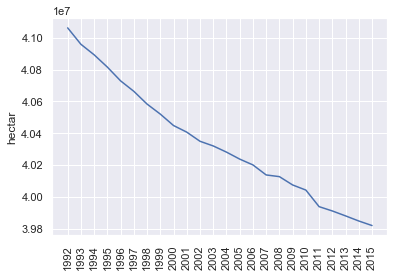

In [25]:
forest_sum = df_forest.sum().to_frame('hectar')
ax = sns.lineplot(x=forest_sum.index, y="hectar", data=forest_sum)
_ = ax.set_xticklabels(labels=forest_sum.index, rotation=90)

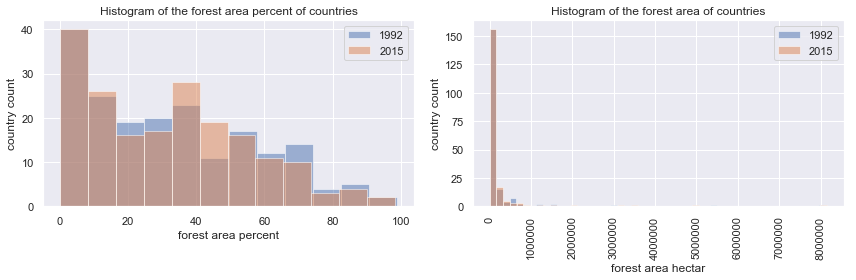

In [63]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

n, bins, patches = ax1.hist(df_forest_ratio['1992'].dropna(), alpha=0.5, bins=12)
n, bins, patches = ax1.hist(df_forest_ratio['2015'].dropna(), alpha=0.5, bins=12)

ax1.set_xlabel('forest area percent')
ax1.set_ylabel('country count')
ax1.set_title('Histogram of the forest area percent of countries')
ax1.legend()

_ = ax2.hist(df_forest['1992'].dropna(), alpha=0.5, bins=50)
_ = ax2.hist(df_forest['2015'].dropna(), alpha=0.5, bins=50)

ax2.set_xlabel('forest area hectar')
ax2.set_ylabel('country count')
ax2.set_title('Histogram of the forest area of countries')
plt.xticks(rotation='vertical')
ax2.legend()

fig.tight_layout()

In [27]:
top_fa = df_forest[['1992', '2015']].sort_values(by=['1992'], ascending=False).head(10)
top_fd = df_forest_ratio[['1992', '2015']].sort_values(by=['1992'], ascending=False).head(10)
top_fa

,1992,2015
geo,,
Russia,8090000.0,8150000.0
Brazil,5420000.0,4940000.0
Canada,3480000.0,3470000.0
United States,3030000.0,3100000.0
China,1610000.0,2080000.0
"Congo, Dem. Rep.",1600000.0,1530000.0
Australia,1290000.0,1250000.0
Indonesia,1150000.0,910000.0
Peru,776000.0,740000.0


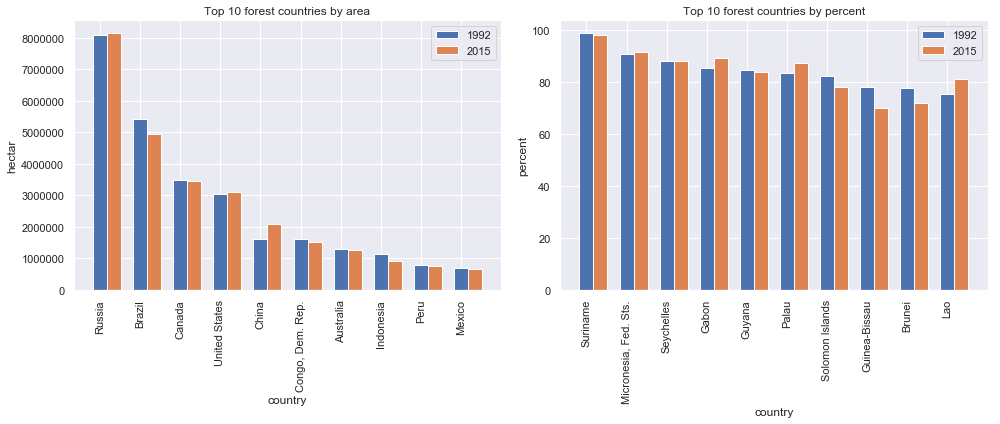

In [33]:
n_groups = 10
index = np.arange(n_groups)
bar_width = 0.35

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.bar(index, top_fa['1992'], bar_width, label='1992', tick_label=n_groups) 
ax1.bar(index + bar_width, top_fa['2015'], bar_width, label='2015')
ax1.set_xlabel("country")
ax1.set_ylabel("hectar")
ax1.set_title("Top 10 forest countries by area")
ax1.set_xticklabels(top_fa.index, rotation=90)
ax1.legend()

ax2.bar(index, top_fd['1992'], bar_width, label='1992', tick_label=n_groups) 
ax2.bar(index + bar_width, top_fd['2015'], bar_width, label='2015')
ax2.set_xlabel("country")
ax2.set_ylabel("percent")
ax2.set_title("Top 10 forest countries by percent")
ax2.set_xticklabels(top_fd.index, rotation=90)
ax2.legend()
 
fig.tight_layout()

In [35]:
forestation = (df_forest['2015'] - df_forest['1992']).sort_values(ascending=False)
forestation_extremes = forestation[:5].append(forestation[-5:])
forestation_extremes.to_frame()

,0
geo,
China,470000.0
United States,70000.0
India,65000.0
Russia,60000.0
Vietnam,49600.0
Myanmar,-93000.0
Nigeria,-94100.0
Sudan,-112000.0
Indonesia,-240000.0


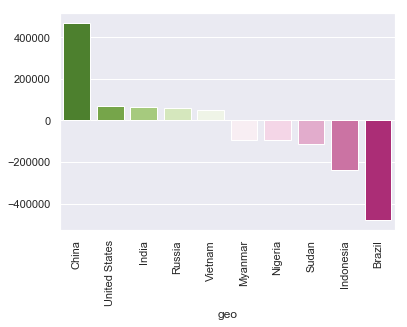

In [38]:
ax = sns.barplot(forestation_extremes.index, forestation_extremes.values, palette='PiYG_r')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Research Question 2  (Replace this header name!)

In [40]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [41]:
def country_correlation(row, df_tocorrelate):
    if df_tocorrelate.index.contains(row.name):
        return row.corr(df_tocorrelate.loc[row.name])       

In [42]:
for k, v in df_dict.items():
    print(k + " correlation with forest area: ")
    print(df_forest.apply(axis=1, func=lambda x: country_correlation(x,v)).mean())
    print()

forest_area correlation with forest area: 
1.0

forest_ratio correlation with forest area: 
0.9723916187453951

population_total correlation with forest area: 
-0.14647306796708426

population_growth correlation with forest area: 
0.02585921338233156

population_density correlation with forest area: 
-0.14676544615624423

gdp_growth_pc correlation with forest area: 
-0.06129582651527704

gdp_tot correlation with forest area: 
0.010633015785713296

gdp_pc correlation with forest area: 
0.058218228990425815

agricultural_area correlation with forest area: 
-0.3237673486584471

agricultural_gdp correlation with forest area: 
-0.07784575808041962

surface_area correlation with forest area: 
0.03627464311698382

agro_area correlation with forest area: 
-0.3217563713375872



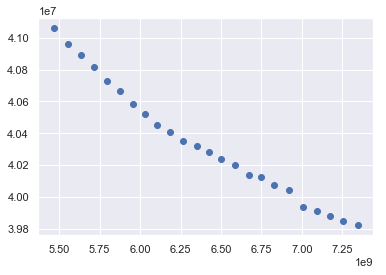

In [43]:
plt.scatter(df_popt.sum(), df_forest.sum())

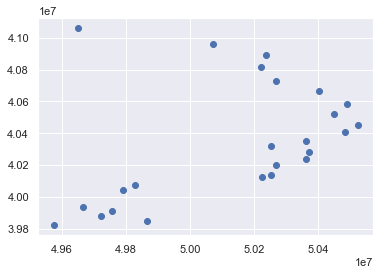

In [44]:
plt.scatter(df_agr_area.sum(), df_forest.sum())

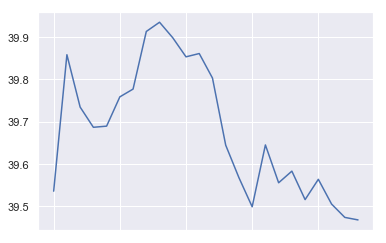

In [45]:
df_agrtoland.mean().plot()

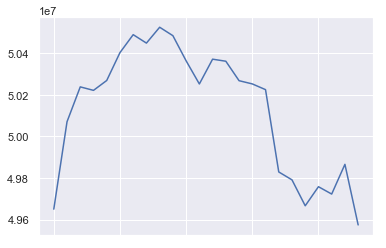

In [48]:
df_agr_area.sum().plot()

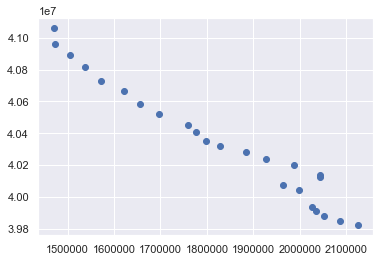

In [65]:
plt.scatter(df_gdp_pc.dropna().sum(), df_forest.sum())

In [53]:
df_global = df_forest.sum().to_frame().rename(columns={0: "global_forest"})
df_global = pd.concat([df_global, df_popt.sum().rename('global_population')], axis=1)
df_global = pd.concat([df_global, df_gdp_tot.sum().rename('global_gdp')], axis=1)
df_global = pd.concat([df_global, df_agr_area.sum().rename('global_agriculture')], axis=1)
df_global

,global_forest,global_population,global_gdp,global_agriculture
1992,41062639.9,5466074739,3.873283e+13,4.964989e+07
1993,40959522.8,5557523658,3.932121e+13,5.007032e+07
1994,40893304.8,5636299128,4.044883e+13,5.023795e+07
1995,40815957.7,5715880980,4.168720e+13,5.022117e+07
1996,40729508.7,5797131138,4.309879e+13,5.026866e+07
1997,40663731.6,5876906562,4.472056e+13,5.040270e+07
1998,40583612.6,5958576691,4.584027e+13,5.048904e+07
1999,40520623.6,6030165431,4.727628e+13,5.044848e+07
2000,40448703.5,6103583205,4.933775e+13,5.052473e+07
2001,40407195.9,6185173098,5.027790e+13,5.048414e+07


In [71]:
df_gdp_pc['2015'].describe()

count       185.000000
mean      13380.529730
std       18648.762614
min         227.000000
25%        1760.000000
50%        5660.000000
75%       14900.000000
max      108000.000000
Name: 2015, dtype: float64

In [104]:
low_inc = df_gdp_pc[df_gdp_pc['2015'] < df_gdp_pc['2015'].describe()['25%']]
mid_low_inc = df_gdp_pc[(df_gdp_pc['2015'] >= df_gdp_pc['2015'].describe()['25%']) & (df_gdp_pc['2015'] < df_gdp_pc['2015'].describe()['50%'])]
mid_high_inc = df_gdp_pc[(df_gdp_pc['2015'] >= df_gdp_pc['2015'].describe()['50%']) & (df_gdp_pc['2015'] < df_gdp_pc['2015'].describe()['75%'])]
high_inc = df_gdp_pc[df_gdp_pc['2015'] >= df_gdp_pc['2015'].describe()['75%']]
print(df_forest_ratio.apply(axis=1, func=lambda x: country_correlation(x,low_inc)).mean())
print(df_forest_ratio.apply(axis=1, func=lambda x: country_correlation(x,mid_low_inc)).mean())
print(df_forest_ratio.apply(axis=1, func=lambda x: country_correlation(x,mid_high_inc)).mean())
print(df_forest_ratio.apply(axis=1, func=lambda x: country_correlation(x,high_inc)).mean())


-0.2569928530203452
0.006727085993068413
0.12383702310955141
0.36994893570076026


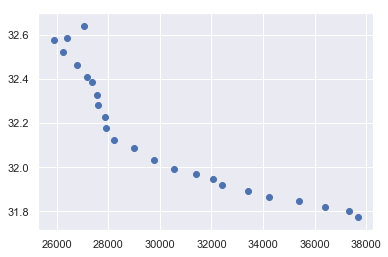

In [106]:
plt.scatter(low_inc.dropna().sum(), df_forest_ratio.mean())

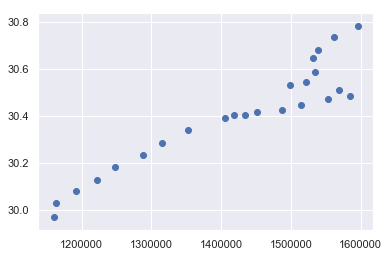

In [116]:
df_forest_ratio.loc[high_inc.dropna().index]
plt.scatter(high_inc.dropna().sum(), df_forest_ratio.loc[high_inc.dropna().index].mean())

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!